In [1]:
import sys
sys.path.append("../")


import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
%matplotlib notebook
from matplotlib import cm
from netCDF4 import Dataset,MFDataset
import glob

%load_ext autoreload
%autoreload 2

import pyfesom as pf
%aimport pyfesom

no cmocean


In [43]:
meshpath = '/work/ollie/orichter/mesh/oce0_z'
mesh = pf.fesom_mesh(meshpath, abg=[0,0,0],cavity=False)
fl = MFDataset(sorted(glob.glob('/work/ollie/orichter/data/oce0comdwu_z_0.10/RG47911.202?.forcing.diag.nc')))
melt1 = fl.variables['wnet']
fl = MFDataset(sorted(glob.glob('/work/ollie/orichter/data/oce0comdw_z_0.10/RG47911.202?.forcing.diag.nc')))
melt2 = fl.variables['wnet']

Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds


In [41]:
days=fl['time'][:]/3600/24

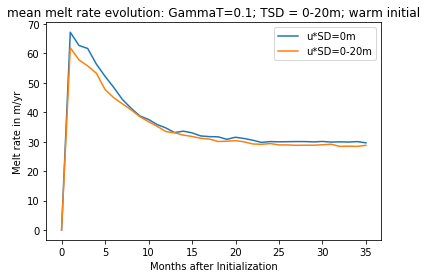

In [45]:
%matplotlib inline
plt.close()
nod2d = np.arange(mesh.n2d)
nod_melt = nod2d[mesh.zcoord[nod2d]>300]
plt.plot(np.mean(melt1[:36,nod_melt]*3600*24*365.25,1),label='u*SD=0m')
plt.plot(np.mean(melt2[:36,nod_melt]*3600*24*365.25,1),label='u*SD=0-20m')
plt.legend()
plt.ylabel('Melt rate in m/yr')
plt.xlabel('Months after Initialization')
plt.title('mean melt rate evolution: GammaT=0.1; TSD = 0-20m; warm initial')
plt.show()

<IPython.core.display.Javascript object>


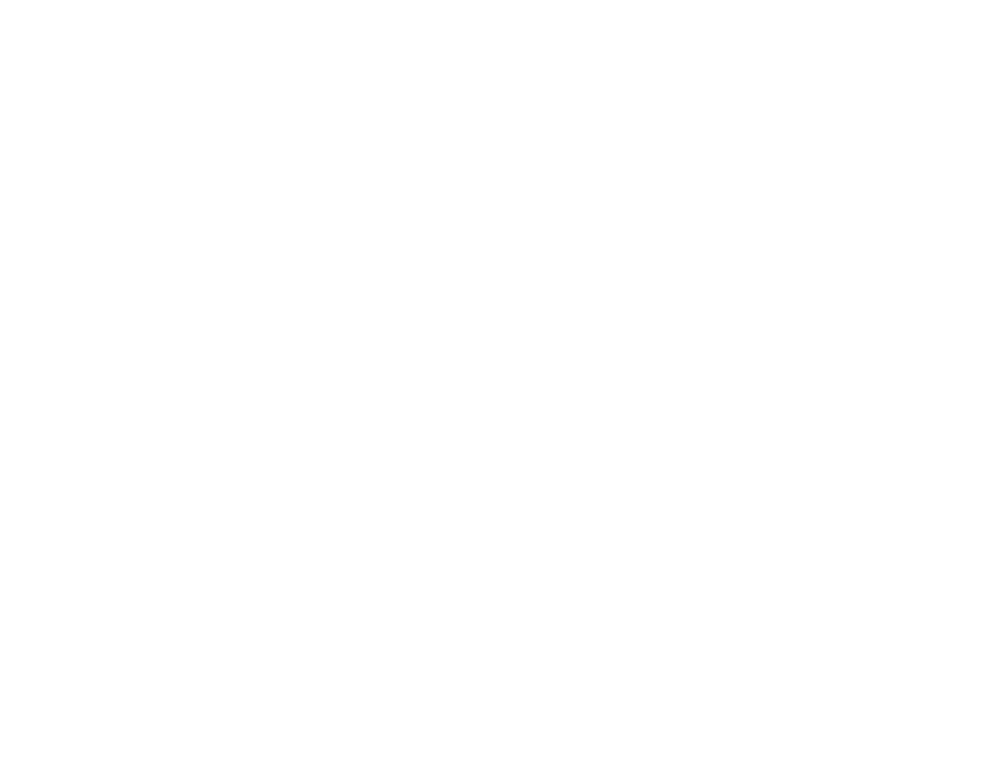

For depth 0 model level -0.0 will be used


In [26]:
plt.figure(figsize=(9,7))
level_data, elem_no_nan = pf.get_data(mesh.cflag,mesh,0)
level_data = level_data
#levels = np.arange(-1.9, 1.0, 0.1)
levels = np.linspace(level_data.min(),level_data.max(),10)
plt.tricontourf(mesh.x2, mesh.y2, elem_no_nan[::], level_data, levels = levels, cmap=cm.Spectral_r, extend='both')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
cbar.set_label("Melt rate in m/yr")
plt.title('Melt rate for boundary restoring test (warm initial+cold forcing after 1 month)')
plt.tight_layout()
plt.close()